# Analysis of Factors Affecting Cardiovascular Health Among Men and Women

## 1. Explore Data

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [56]:
cn = ['age','sex','chest_pain_type','restbps','chol','blood_sugar','restecg','max_heartrate','exang','oldpeak','slope','num_mjr_vess','thal','dx']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                 names=cn)
df.head(3)


,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [57]:
df.shape

(303, 14)

In [58]:
df.dtypes

age                float64
sex                float64
chest_pain_type    float64
restbps            float64
chol               float64
blood_sugar        float64
restecg            float64
max_heartrate      float64
exang              float64
oldpeak            float64
slope              float64
num_mjr_vess        object
thal                object
dx                   int64
dtype: object

In [59]:
      df[(df['age'] == '?') |
                (df['sex'] == '?') |
                (df['chest_pain_type'] == '?') |
                (df['restbps'] == '?') |  
                (df['chol'] == '?') |
                 (df['chest_pain_type'] == '?') |
                (df['restecg'] == '?') |
                (df['max_heartrate'] == '?') |
                (df['exang'] == '?') |
                (df['oldpeak'] == '?') |
                (df['slope'] == '?') |
                (df['num_mjr_vess'] == '?') |
                (df['thal'] == '?') |
                (df['dx'] == '?')]

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [60]:
df[(df=='?')] = np.nan

In [61]:
   df[(df['age'] == '?') |
                (df['sex'] == '?') |
                (df['chest_pain_type'] == '?') |
                (df['restbps'] == '?') |  
                (df['chol'] == '?') |
                 (df['chest_pain_type'] == '?') |
                (df['restecg'] == '?') |
                (df['max_heartrate'] == '?') |
                (df['exang'] == '?') |
                (df['oldpeak'] == '?') |
                (df['slope'] == '?') |
                (df['num_mjr_vess'] == '?') |
                (df['thal'] == '?') |
                (df['dx'] == '?')]

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx


In [62]:
df.isna().sum()

age                0
sex                0
chest_pain_type    0
restbps            0
chol               0
blood_sugar        0
restecg            0
max_heartrate      0
exang              0
oldpeak            0
slope              0
num_mjr_vess       4
thal               2
dx                 0
dtype: int64

## 2. Preprocess the data

Since there are Nan values in columns num_mjr_vess and thal , dropping those columns for preprocessing

In [63]:
df.dropna(inplace=True)

In [64]:
df.isna().sum()

age                0
sex                0
chest_pain_type    0
restbps            0
chol               0
blood_sugar        0
restecg            0
max_heartrate      0
exang              0
oldpeak            0
slope              0
num_mjr_vess       0
thal               0
dx                 0
dtype: int64

converting thal and num_mjr_vess to numeric datatype

In [65]:
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
df['num_mjr_vess'] = pd.to_numeric(df['num_mjr_vess'], errors='coerce')
df.dtypes


age                float64
sex                float64
chest_pain_type    float64
restbps            float64
chol               float64
blood_sugar        float64
restecg            float64
max_heartrate      float64
exang              float64
oldpeak            float64
slope              float64
num_mjr_vess       float64
thal               float64
dx                   int64
dtype: object

dx: diagnosis of heart disease (angiographic disease status).
This column provides the severity of heart patient ranging from (0 to 4) where 0 is abcense of  heart disease and 4 is the highest severity of heart disease


In [66]:
df['dx'].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: dx, dtype: int64

To simplify our analysis we are creating other column named "heart_dx" based on "dx" where the values are 0 and 1 .
0 = No heart disease
1 = Has heart disease ( 1,2,3,4)

In [67]:
df['heart_dx'] = df['dx'].apply(lambda x: 1 if x >= 1 else 0)
df['heart_dx'].value_counts()

0    160
1    137
Name: heart_dx, dtype: int64

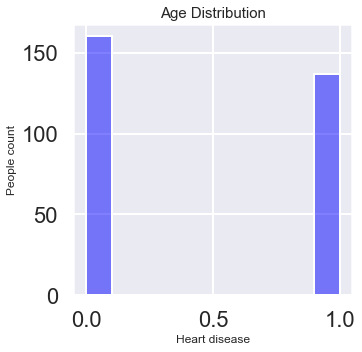

In [90]:
#Histogram of people without heart disease vs people with heart disease
plt.figure(figsize=(5,5))
sns.histplot(data=df["heart_dx"], alpha=0.5 ,color="blue")
plt.xlabel("Heart disease",fontsize=12)
plt.ylabel("People count", fontsize=12)
plt.title("Age Distribution", fontsize=15)
plt.show()

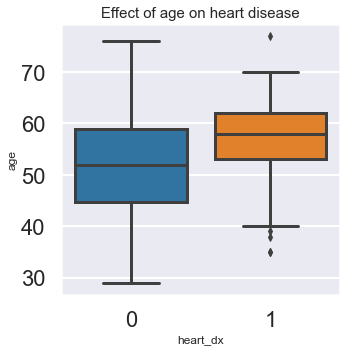

In [97]:
plt.figure(figsize=(5,5))
sns.boxplot (x="heart_dx",y='age',data=df)
plt.xlabel("heart_dx",fontsize=12)
plt.ylabel("age", fontsize=12)
plt.title("Effect of age on heart disease", fontsize=15)
plt.show()


It is seen from the above diagram that a people of higher age has high probability of getting heart disease

Creating specific columns for Men and Women to use in later analysis

<AxesSubplot:>

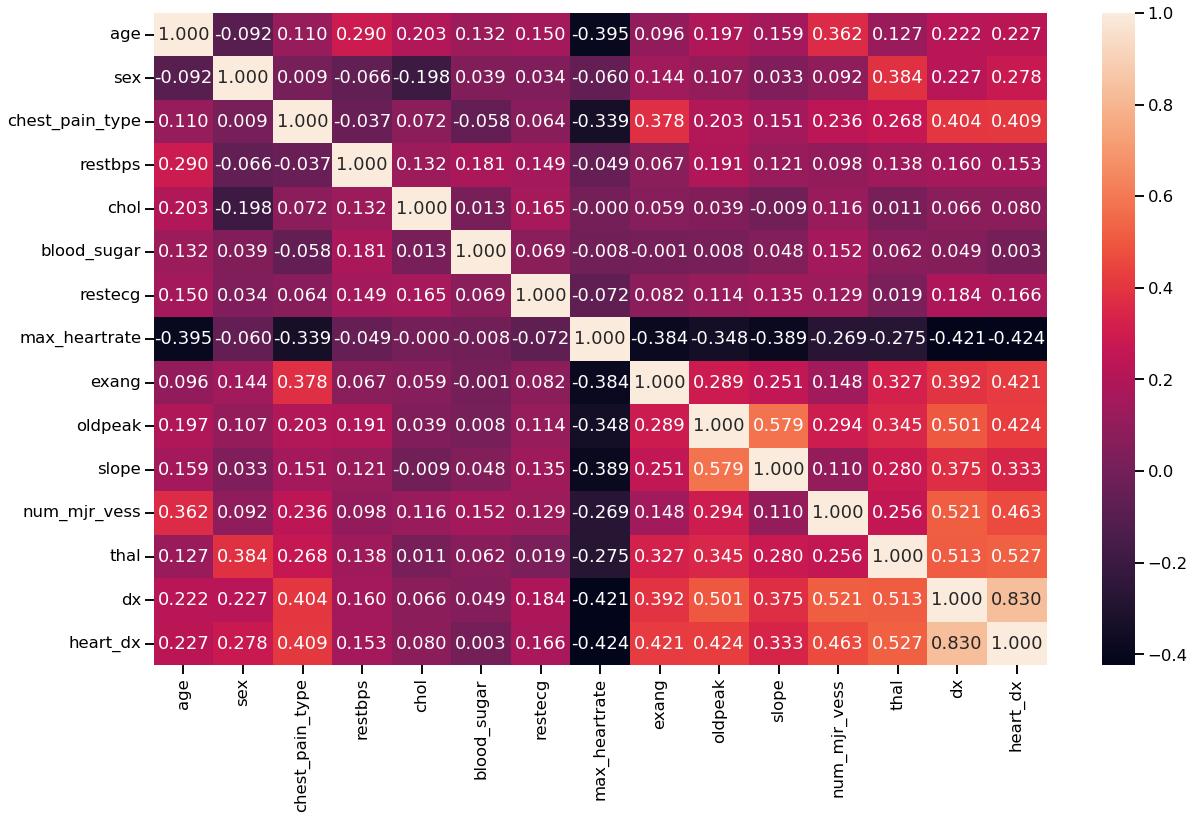

In [70]:
plt.figure( figsize = (20, 12) )
sns.heatmap(df.corr(), annot=True, fmt=".3f")

In [16]:
df['Men'] = df['sex'] == 1 # Males
df['Women'] = df['sex'] == 0 # Females
df['Men'] = pd.to_numeric(df['Men'], errors='coerce')
df['Women'] = pd.to_numeric(df['Women'], errors='coerce')
df.head()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx,heart_dx,Men,Women
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,True,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,True,False
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,True,False
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,True,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,False,True


## 3.LOGISTIC REGRESSION MODEL based on Sex

### model_all - Logistic regression model comparing all attributes

In [17]:
model_all = 'heart_dx ~ \
                 age + sex + chest_pain_type + restbps + chol + blood_sugar + \
                 restecg + max_heartrate + slope + exang + oldpeak + age:sex'

result_all = smf.logit(formula=model_all, data=df).fit()
print(result_all.summary())

Optimization terminated successfully.
         Current function value: 0.420448
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           12
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.3908
Time:                        19:50:54   Log-Likelihood:                -124.87
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.781e-28
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.3797      3.174     -2.325      0.020     -13.601      -1.159
age           

We used above model to determine significant attributes considering alpha=0.05.Based on the results, we found that the significant factors are chest_pain_type, slope, num_mjr_vess, thal, restbps, and oldpeak.

### model_1 - Logistic regression model on age, sex, chol, blood_sugar, restecg, slope, and age:sex interaction


In [18]:
model_1 = 'heart_dx ~ chest_pain_type + restbps + max_heartrate + exang + oldpeak'
result_1 = smf.logit(formula=model_1, data=df).fit()
print(result_1.summary())

Optimization terminated successfully.
         Current function value: 0.473520
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                            5
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.3139
Time:                        19:56:51   Log-Likelihood:                -140.64
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.545e-26
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2496      1.760     -1.278      0.201      -5.699       1.199
chest_pain_typ

From the above reults,it is shown that restbps was no longer considered a significant factor anymore. Therefore, it was removed from the next model, model_2.

### model_2¶- Logistic regression model on chest_pain_type, max_heartrate, exang, oldpeak

In [19]:
model_2 = 'heart_dx ~ chest_pain_type + max_heartrate + exang + oldpeak'
result_2 = smf.logit(formula=model_2, data=df).fit()
print(result_2.summary())

Optimization terminated successfully.
         Current function value: 0.479995
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.3045
Time:                        20:01:49   Log-Likelihood:                -142.56
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.964e-26
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0356      1.329     -0.027      0.979      -2.640       2.569
chest_pain_typ

# model_Men_all - Logistic regression model on Male comparing all attributes

In [20]:
model_Men_all = 'heart_dx ~ age + Men + \
                            chest_pain_type + restbps + chol + blood_sugar + \
                            restecg + max_heartrate + slope + exang + oldpeak + Men:age'

result_men_all = smf.logit(formula=model_Men_all, data=df).fit()
print(result_men_all.summary())


Optimization terminated successfully.
         Current function value: 0.420448
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           12
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.3908
Time:                        20:08:27   Log-Likelihood:                -124.87
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.781e-28
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.3797      3.174     -2.325      0.020     -13.601      -1.159
Men[T.True]   

The above model is used to determine significant factors for Men causing heart diseas considering alpha=0.05.
Based on the results, we found that the significant factors are the same as the above models: chest pain type, max heartrate, restbps, exang, and oldpeak. 
Likewise, instead of an interaction effect on Age and Sex, I used Men (males) and Age as the interaction effect.
It proved to have no significance either.
It is also noticed thatage and sex are not a significant factor like model_all

### model_Men1 - Logistic regression model on age, male, chol, blood_sugar, restecg, slope, and male:sex interaction

In [24]:
model_Men1 = 'heart_dx ~ chest_pain_type + restbps + max_heartrate + exang + oldpeak'

result_men1 = smf.logit(formula=model_Men1, data=df[df['Men'] == True]).fit()
print(result_men1.summary())

Optimization terminated successfully.
         Current function value: 0.477626
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  201
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                            5
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.3043
Time:                        20:28:39   Log-Likelihood:                -96.003
converged:                       True   LL-Null:                       -138.00
Covariance Type:            nonrobust   LLR p-value:                 1.219e-16
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9222      2.229      0.414      0.679      -3.447       5.292
chest_pain_typ

In the above model, all the insiginificant factors, including the interaction effect are removed.
That left the following factors to be considered significant: Chest pain type, max heartrate, exang, and oldpeak. This is the same results as in Model_1. Removing the factor restbps as a factor before running the final model, model_Men2.


### model_Men2 - Logistic regression model on Male, chest_pain_type, max_heartrate, exang, oldpeak

In [27]:
model_Men2 = 'heart_dx ~ chest_pain_type + max_heartrate + exang + oldpeak'
result_men2 = smf.logit(formula=model_Men2, data=df[df['Men'] == True]).fit()
print(result_men2.summary())

Optimization terminated successfully.
         Current function value: 0.481420
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  201
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.2988
Time:                        20:30:46   Log-Likelihood:                -96.765
converged:                       True   LL-Null:                       -138.00
Covariance Type:            nonrobust   LLR p-value:                 5.202e-17
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.7314      1.691      1.615      0.106      -0.583       6.046
chest_pain_typ

### model_W_all - Logistic regression model on Female comparing all attributes

In [28]:
model_W_all = 'heart_dx ~ age + Women + chest_pain_type + restbps + chol + blood_sugar + restecg + max_heartrate + slope + exang + oldpeak + Women:age'

result_W_all = smf.logit(formula=model_W_all, data=df).fit()
print(result_W_all.summary())

Optimization terminated successfully.
         Current function value: 0.420448
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           12
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.3908
Time:                        20:34:51   Log-Likelihood:                -124.87
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.781e-28
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.9552      2.488     -1.992      0.046      -9.832      -0.078
Women[T.

### model_W1 - Logistic regression model on age, women, chol, blood_sugar, restecg, slope, and male:sex interaction¶

In [29]:
model_W1 = 'heart_dx ~ chest_pain_type + restbps + max_heartrate + exang + oldpeak'

result_W1 = smf.logit(formula=model_W1, data=df[df['Women'] == True]).fit()
print(result_W1.summary())


Optimization terminated successfully.
         Current function value: 0.312217
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                   96
Model:                          Logit   Df Residuals:                       90
Method:                           MLE   Df Model:                            5
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.4556
Time:                        20:36:14   Log-Likelihood:                -29.973
converged:                       True   LL-Null:                       -55.055
Covariance Type:            nonrobust   LLR p-value:                 1.282e-09
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.4017      3.941     -2.132      0.033     -16.126      -0.678
chest_pain_typ

### model_W2 -  Logistic regression model on Women, chest_pain_type, max_heartrate, exang, oldpeak¶

In [31]:
model_W2 = 'heart_dx ~ chest_pain_type + max_heartrate + exang + oldpeak'

result_W2 = smf.logit(formula=model_W2, data=df[df['Women'] == True]).fit()
print(result_W2.summary())

Optimization terminated successfully.
         Current function value: 0.333756
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                   96
Model:                          Logit   Df Residuals:                       91
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.4180
Time:                        20:37:11   Log-Likelihood:                -32.041
converged:                       True   LL-Null:                       -55.055
Covariance Type:            nonrobust   LLR p-value:                 2.429e-09
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.8285      2.977     -1.286      0.198      -9.664       2.007
chest_pain_typ

<Figure size 720x576 with 0 Axes>

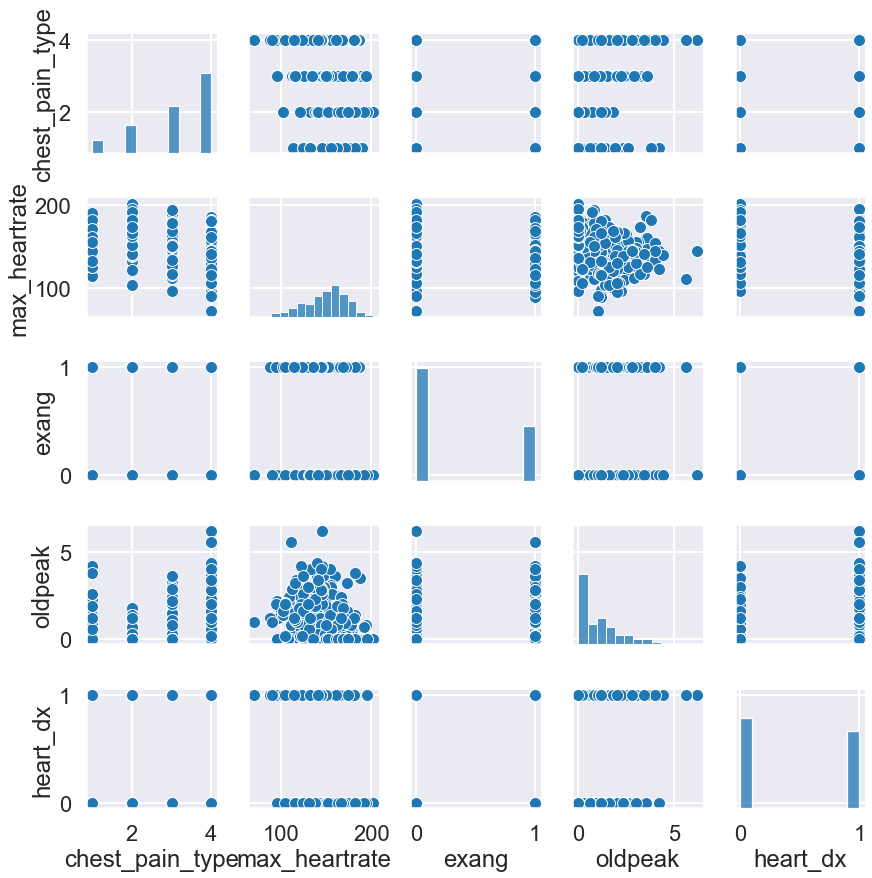

In [94]:
plt.figure(figsize=(10,8))
sns.pairplot(df[['chest_pain_type','max_heartrate','exang','oldpeak','heart_dx']])

plt.show()

## 4 . Logistic Regression model based on Age group

### Creating Age Ranges for Each of the Listed Individuals in the study.

we wanted to understand the number of individuals per age groupping.

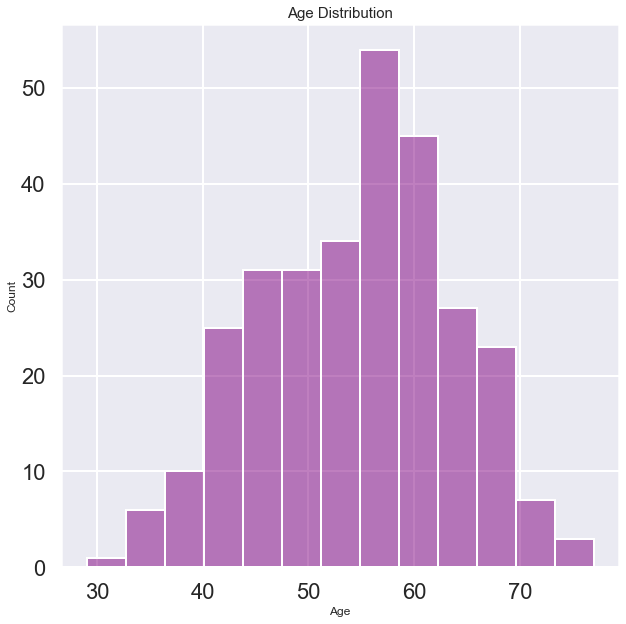

In [86]:
#Histogram of distribution of age
plt.figure(figsize=(10,10))
sns.histplot(data=df["age"], alpha=0.5 ,color="purple")
plt.xlabel("Age",fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Age Distribution", fontsize=15)
plt.show()

In [32]:
df[df['age'].between(29,45)].shape[0]

61

In [33]:
df[df['age'].between(46, 60)].shape[0]

157

In [34]:
df[df['age'].between(61,77)].shape[0]

79

In [35]:
df[df['age'].between(62, 77)].shape[0]

71

 Created columns to identify which age group each person belonged to

In [39]:
df['Age_low'] = df['age'].between(29, 45)
df['Age_med'] = df['age'].between(46, 61) #smallest range but biggest volume
df['Age_high'] = df['age'].between(62, 77)
df.tail()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx,heart_dx,Men,Women,Age_low,Age_med,Age_high
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,1,False,True,False,True,False
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,True,False,True,False,False
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,True,False,False,False,True
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,True,False,False,True,False
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,False,True,False,True,False


### model_Age_low

This model shows what factors are significant factors for Lower Age range, 29 - 45. We used alpha=0.05 to determine each factors significance. 

In [43]:
model_Age_low = 'heart_dx ~ Age_low + sex + chest_pain_type + restbps + chol + \
                            blood_sugar + restecg + max_heartrate + slope + exang + oldpeak + Age_low:sex'


result_Age_low = smf.logit(formula=model_Age_low, data=df).fit() 
print(result_Age_low.summary())

Optimization terminated successfully.
         Current function value: 0.418016
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           12
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.3943
Time:                        13:18:35   Log-Likelihood:                -124.15
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.427e-28
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -5.4442      2.158     -2.523      0.012      -9.674      -1.215
Ag

we found that the significant factors are slightly different than the others. We found that the significant factors are sex, chest pain type, restbps, max heartrate, exang, and oldpeak.

### model_Age_low_sex

This model is slighly different than the previous. I included sex, with the same factors, it seems to be more significant.

In [47]:
model_Age_low_sex = 'heart_dx ~ sex + chest_pain_type + restbps +  max_heartrate + exang + oldpeak'

result_Age_low_sex = smf.logit(formula=model_Age_low_sex, data=df).fit()
print(result_Age_low_sex.summary())

Optimization terminated successfully.
         Current function value: 0.435038
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.3696
Time:                        13:27:15   Log-Likelihood:                -129.21
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 3.667e-30
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.5124      1.827     -1.923      0.054      -7.092       0.068
sex           

### model_Age_med

This model shows what factors are significant factors for Medium Age range, 46 - 61. We used alpha=0.05 to determine each factors significance. Based on the results, we found that the significant factors are similar to model_Age1 but still different.

In [48]:
model_Age_med = 'heart_dx ~ Age_med + sex + chest_pain_type + restbps + chol + max_heartrate + slope + exang + oldpeak + Age_med:sex'

result_Age_med = smf.logit(formula=model_Age_med, data=df).fit()
print(result_Age_med.summary())

Optimization terminated successfully.
         Current function value: 0.421054
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           10
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.3899
Time:                        13:29:18   Log-Likelihood:                -125.05
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 3.496e-29
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -6.0291      2.171     -2.777      0.005     -10.285      -1.773
Ag

We found that the significant factors are sex, chest pain type, chol, restbps, max heartrate, exang, and oldpeak.

### model_Age_med_sex 

In [49]:
model_Age_med_sex = 'heart_dx ~ sex + chest_pain_type + restbps + chol + max_heartrate + exang + oldpeak'

result_Age2a = smf.logit(formula=model_Age_med_sex, data=df).fit()
print(result_Age2a.summary())

Optimization terminated successfully.
         Current function value: 0.427624
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            7
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.3804
Time:                        13:30:40   Log-Likelihood:                -127.00
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.294e-30
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.7825      1.960     -2.441      0.015      -8.623      -0.942
sex           

### model_Age_high

This model shows what factors are significant factors for Medium Age range, 62 - 77. We used alpha=0.05 to determine each factors significance. Based on the results, we found that the significant factors are similar to *model_Age_low*. We found that the significant factors are sex, chest pain type, restbps, max heartrate, exang, and oldpeak. 


In [50]:
model_Age_high = 'heart_dx ~ Age_high + sex + chest_pain_type + restbps + chol + max_heartrate + slope + exang + oldpeak'

result_Age_high = smf.logit(formula=model_Age_high, data=df).fit()
print(result_Age_high.summary())

Optimization terminated successfully.
         Current function value: 0.425322
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                            9
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.3837
Time:                        14:23:48   Log-Likelihood:                -126.32
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.695e-29
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.4072      2.121     -2.549      0.011      -9.565      -1.250
Age_high[T.

In [51]:
model_Age3a = 'heart_dx ~ sex + chest_pain_type + restbps + max_heartrate + exang + oldpeak'

result_Age3a = smf.logit(formula=model_Age3a, data=df).fit()
print(result_Age3a.summary())

Optimization terminated successfully.
         Current function value: 0.435038
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.3696
Time:                        14:24:05   Log-Likelihood:                -129.21
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 3.667e-30
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.5124      1.827     -1.923      0.054      -7.092       0.068
sex           

### StatsModel Conclusions


The major factors to classifying heart disease are chest_pain_type, restbps, max_heartrate, exang, and oldpeak. However, when we analyzed the data specifically based on age ranges and for each regression model, sex was considered a significant factor.

The middle age group, 46 - 61, found that chol is a significant factor. This age group had the largest population. This could indicate that choloesterol matters more based on age range?

I used the metrics function to assess the most accurate model, it seems that according to the statsmodel, leaving sex in as a significant factor increases the accruacy, Precision, Recall, and F1-Score are all almost the same otherwise. This makes for a slighlty inconclusive results to our original question.